In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [31]:
news=pd.read_csv('news(Detect Fake News).csv')

In [32]:
news.head()

,number,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [33]:
news=news.drop(['number'],axis=1)

In [34]:
news.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [35]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


##### This dataset has a shape of 6335×4. The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE.

In [36]:
news.nunique()

title    6256
text     6060
label       2
dtype: int64

In [37]:
news.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


##### get the labels from the DataFrame

In [38]:
labels=news.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

##### Plotting counts of labels

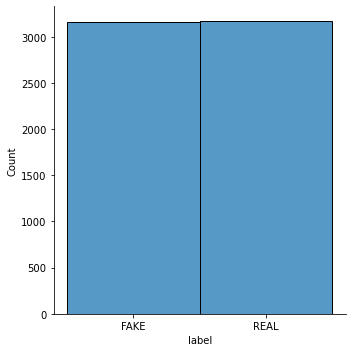

In [39]:
sns.displot(labels)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

##### Split the dataset into training and testing sets.

In [41]:
x_train,x_test,y_train,y_test=train_test_split(news['text'], labels, test_size=0.2, random_state=7)

##### Now, fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

In [42]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df =0.9)

In [43]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier

##### then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.

In [45]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [46]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.05%


In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

##### We got an accuracy of 92.82% with this model. Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives.

In [48]:
conf_mat=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
conf_mat

array([[594,  44],
       [ 44, 585]], dtype=int64)

##### So with this model, we have 590 true positives, 584 true negatives, 48 false positives, and 44 false negatives, ie we have 590 fake news and 584 real news.

##### Plotting confusion matrix with the help of heat map

<AxesSubplot:>

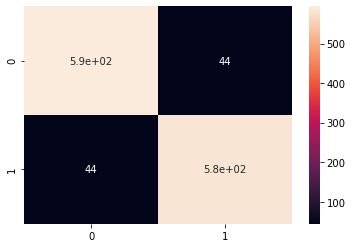

In [49]:
sns.heatmap(conf_mat,annot=True)

<AxesSubplot:>

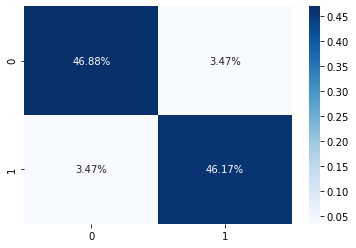

In [50]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True,fmt='.2%', cmap='Blues')